In [1]:
import requests
import lxml.html as lh
import numpy as np
import pandas as pd

%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
url = 'https://www.mohfw.gov.in/'
#Create a handle, page, to handle the contents of the website
page = requests.get(url)
#Store the contents of the website under doc
doc = lh.fromstring(page.content)
#Parse data that are stored between <tr>..</tr> of HTML
tr_elements = doc.xpath('//tr')

In [3]:
[len(T) for T in tr_elements[:12]]

[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]

In [4]:
tr_elements = doc.xpath('//tr')
#Create empty list
col=[]
i=0
#For each row, store each first element (header) and an empty list
for t in tr_elements[0]:
    i+=1
    name=t.text_content()
    print('%d:"%s"'%(i, name))
    col.append((name, []))

1:"S. No."
2:"Name of State / UT"
3:"Active Cases*"
4:"Cured/Discharged/Migrated*"
5:"Deaths**"
6:"Total Confirmed cases*"


In [5]:
#Since out first row is the header, data is stored on the second row onwards
for j in range(1,len(tr_elements)-6):
    #T is our j'th row
    T=tr_elements[j]
    
    #If row is not of size 6, the //tr data is not from our table 
    if len(T)!=6:
        break
    
    #i is the index of our column
    i=0
    
    #Iterate through each element of the row
    for t in T.iterchildren():
        data=t.text_content() 
        #Check if row is empty
        if i>0:
        #Convert any numerical value to integers
            try:
                data=int(data)
            except:
                pass
        #Append the data to the empty list of the i'th column
        col[i][1].append(data)
        #Increment i for the next column
        i+=1

In [6]:
[len(C) for (title,C) in col]

[35, 35, 35, 35, 35, 35]

In [7]:
Dict={title:column for (title,column) in col}
df=pd.DataFrame(Dict)

In [8]:
df.head()

,Active Cases*,Cured/Discharged/Migrated*,Deaths**,Name of State / UT,S. No.,Total Confirmed cases*
0,0,33,0,Andaman and Nicobar Islands,1,33
1,2031,2745,75,Andhra Pradesh,2,4851
2,50,1,0,Arunachal Pradesh,3,51
3,2107,665,4,Assam,4,2776
4,2672,2499,31,Bihar,5,5202


In [9]:
df.drop(['S. No.'], axis=1, inplace=True)
df

,Active Cases*,Cured/Discharged/Migrated*,Deaths**,Name of State / UT,Total Confirmed cases*
0,0,33,0,Andaman and Nicobar Islands,33
1,2031,2745,75,Andhra Pradesh,4851
2,50,1,0,Arunachal Pradesh,51
3,2107,665,4,Assam,2776
4,2672,2499,31,Bihar,5202
5,39,273,5,Chandigarh,317
6,848,308,4,Chhattisgarh,1160
7,20,2,0,Dadar Nagar Haveli,22
8,17712,11357,874,Delhi,29943
9,263,67,0,Goa,330


In [11]:
df['Name of State / UT']

0     Andaman and Nicobar Islands
1                  Andhra Pradesh
2               Arunachal Pradesh
3                           Assam
4                           Bihar
5                      Chandigarh
6                    Chhattisgarh
7              Dadar Nagar Haveli
8                           Delhi
9                             Goa
10                        Gujarat
11                        Haryana
12               Himachal Pradesh
13              Jammu and Kashmir
14                      Jharkhand
15                      Karnataka
16                         Kerala
17                         Ladakh
18                 Madhya Pradesh
19                    Maharashtra
20                        Manipur
21                      Meghalaya
22                        Mizoram
23                       Nagaland
24                         Odisha
25                     Puducherry
26                         Punjab
27                      Rajasthan
28                         Sikkim
29            

In [16]:
#set index name of states for convenience
df.set_index('Name of State / UT', inplace=True)
df.index.name = None

In [17]:
df.head()

,Active Cases*,Cured/Discharged/Migrated*,Deaths**,Total Confirmed cases*
Andaman and Nicobar Islands,0,33,0,33
Andhra Pradesh,2031,2745,75,4851
Arunachal Pradesh,50,1,0,51
Assam,2107,665,4,2776
Bihar,2672,2499,31,5202


In [18]:
df=df.transpose()
df.head()

,Andaman and Nicobar Islands,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,Dadar Nagar Haveli,Delhi,Goa,...,Puducherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telengana,Tripura,Uttarakhand,Uttar Pradesh,West Bengal
Active Cases*,0,2031,50,2107,2672,39,848,20,17712,263,...,75,482,2513,7,15416,1803,646,684,4320,4743
Cured/Discharged/Migrated*,33,2745,1,665,2499,273,308,2,11357,67,...,52,2128,8004,0,17527,1710,192,714,6344,3465
Deaths**,0,75,0,4,31,5,4,0,874,0,...,0,53,246,0,286,137,0,13,283,405
Total Confirmed cases*,33,4851,51,2776,5202,317,1160,22,29943,330,...,127,2663,10763,7,33229,3650,838,1411,10947,8613


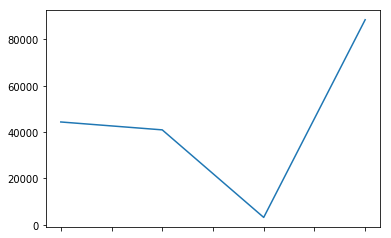

In [22]:
df['Maharashtra'].plot()

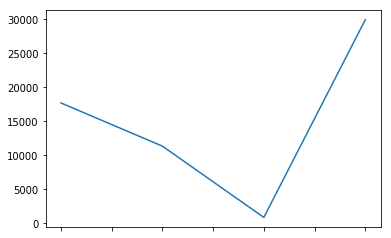

In [23]:
df['Delhi'].plot()

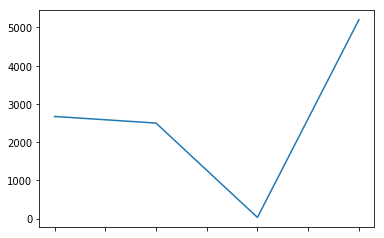

In [24]:
df['Bihar'].plot()

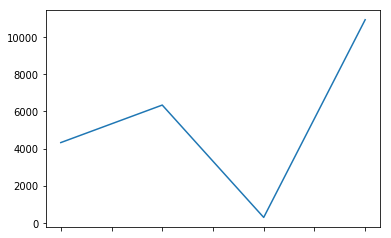

In [26]:
df['Uttar Pradesh'].plot()

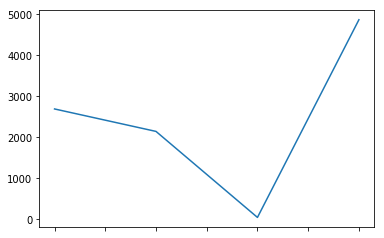

In [27]:
df['Haryana'].plot()

In [29]:
df=df.transpose()
df.head()

,Active Cases*,Cured/Discharged/Migrated*,Deaths**,Total Confirmed cases*
Andaman and Nicobar Islands,0,33,0,33
Andhra Pradesh,2031,2745,75,4851
Arunachal Pradesh,50,1,0,51
Assam,2107,665,4,2776
Bihar,2672,2499,31,5202


In [34]:
df['Total'] = df.sum(axis=1)
df.head()

,Active Cases*,Cured/Discharged/Migrated*,Deaths**,Total Confirmed cases*,Total
Andaman and Nicobar Islands,0,33,0,33,66
Andhra Pradesh,2031,2745,75,4851,9702
Arunachal Pradesh,50,1,0,51,102
Assam,2107,665,4,2776,5552
Bihar,2672,2499,31,5202,10404


In [39]:
print(df.loc['Maharashtra', 'Active Cases*'])
mpl.style.use(['ggplot'])

44384


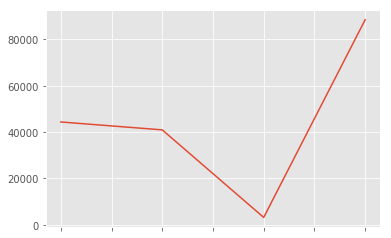

In [47]:
columns=['Active Cases*', 'Cured/Discharged/Migrated*', 'Deaths**', 'Total Confirmed cases*']

Maha=df.loc['Maharashtra', columns]
Maha.head()
Maha.plot()

In [65]:
df_M_D=df.loc[['Maharashtra', 'Delhi', 'Uttar Pradesh'], columns]
df_M_D

,Active Cases*,Cured/Discharged/Migrated*,Deaths**,Total Confirmed cases*
Maharashtra,44384,40975,3169,88528
Delhi,17712,11357,874,29943
Uttar Pradesh,4320,6344,283,10947


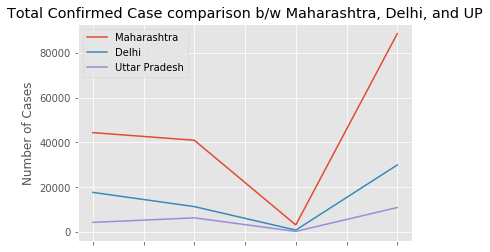

In [70]:
df_M_D=df_M_D.transpose()

df_M_D.plot(kind='line')

plt.title('Total Confirmed Case comparison b/w Maharashtra, Delhi, and UP')
plt.ylabel('Number of Cases')

plt.show()